<a href="https://colab.research.google.com/github/WoobinHwang/google_drive/blob/main/0330_Chapter_5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터 불러오기
- 와인데이터
  - alcohol(알코올 도수), sugar(당도), pH(산도), class(0= 레드 와인, 1= 화이트 와인)

In [25]:
import pandas as pd
wine = pd.read_csv("https://bit.ly/wine_csv_data")
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


- info()
  - 결측치 확인 / 변수 타입

In [26]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [27]:
wine.describe()  # 간단한 통계를 출력

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


# 표준화 작업

In [28]:
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()  # 'alcohol', 'sugar', 'pH'기준으로 재배열
target = wine['class'].to_numpy()  # 'class'기준으로 재배열

# 훈련데이터와 테스트데이터로 분리

In [39]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size= 0.2, random_state= 42
)
print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


- 표준화 진행

In [40]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
ss.fit(train_input)  # 변환 전 훈련시키기
train_scaled= ss.transform(train_input)
test_scaled= ss.transform(test_input)

# 모델 만들기

## 로지스틱회귀

In [31]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))  # 0.7808350971714451
print(lr.score(test_scaled, test_target))  # 0.7776923076923077
print(lr.coef_, lr.intercept_)  # lr.coef_: 기울기, lr.intercept_: 절편

0.7808350971714451
0.7776923076923077
[[ 0.51270274  1.6733911  -0.68767781]] [1.81777902]


# 의사결정트리
- 1975년도 등장
- 다양한 산업에서 많이 쓰임

- 2001년즈음 랜덤 포레스트
  - 캐글대회
  - 2017~2018년까지 정형데이터 대회는 랜덤포래스트가 메인 이론인적이 있었음.

# 로지스틱 회귀
- 수식
 - 의사결정트리의 기본 알고리즘을 활용해서 MS, 구글 등 이런 회사들이 신규 알고리즘을 만듬.
  - XGBoost, LightGBM, CatBoost
  - 캐글 정형데이터
  LIghtGBM (지금 현재 실무에서 많이 쓰임)

  - 4월 말까지는 코드에 집중, 대회 나감
  - PPT (알고리즘 소개)

In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))  # 0.996921300750433
print(dt.score(test_scaled, test_target))  # 0.8592307692307692

0.996921300750433
0.8592307692307692


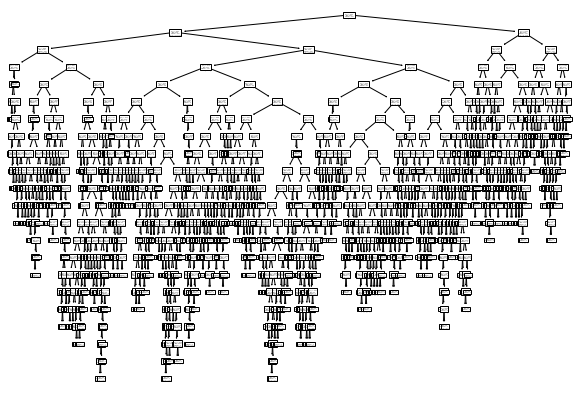

In [33]:
# 객체지향으로 불가
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

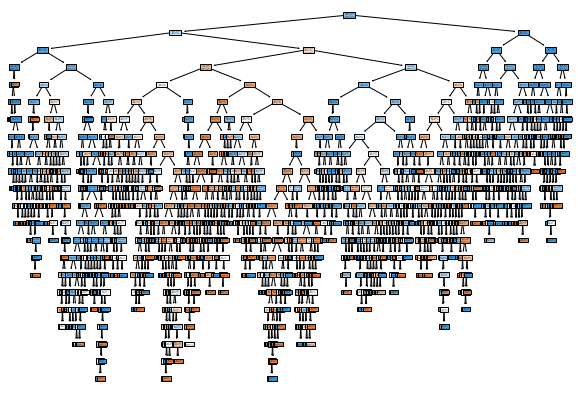

In [34]:
# filled: 색 입히는 매개변수
plt.figure(figsize= (10,7))
plot_tree(dt, max_depth= 100, filled= True, feature_names=['alcohol', 'sugar', 'pH'])  # max_depth: 최대깊이
plt.show()

# 가지치기
- 과대적합을 방지하기 위한 것

In [35]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))
# 비슷하게 나오는 결과를 확인 할 수 있음.

0.8454877814123533
0.8415384615384616


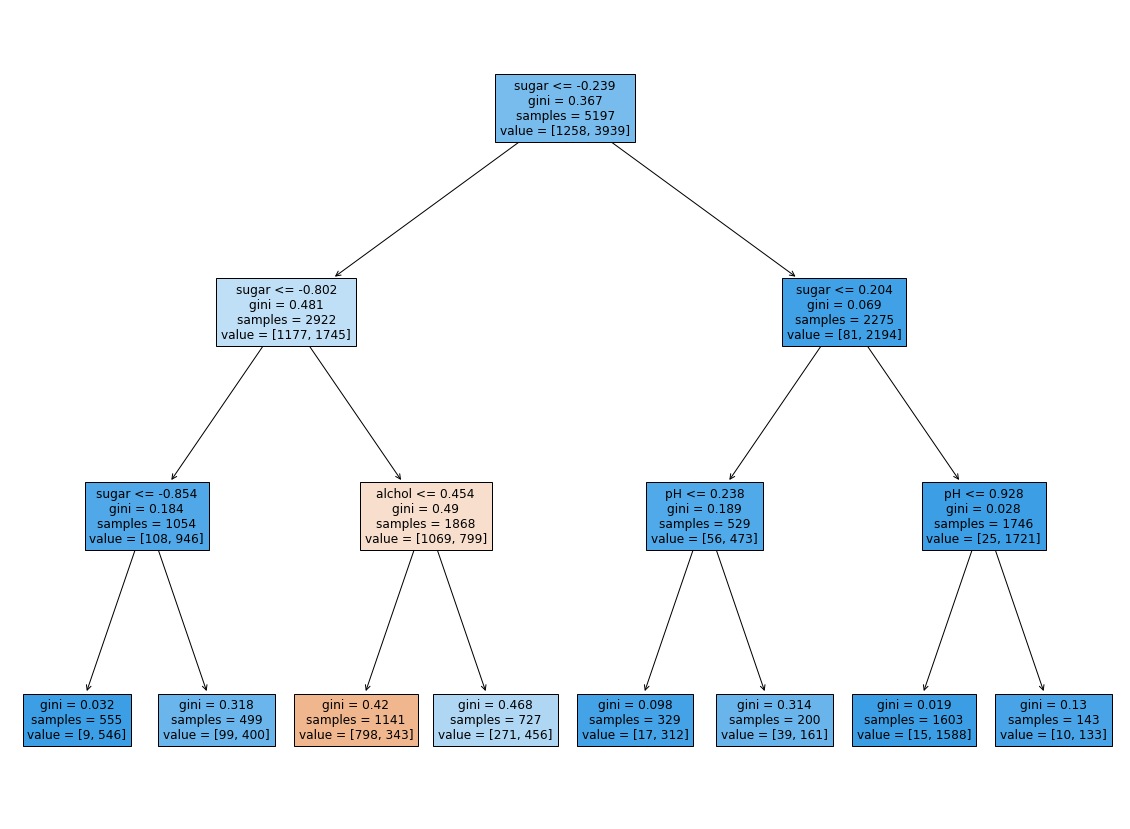

In [36]:
from numpy.ma.core import filled
plt.figure(figsize=(20, 15))
plot_tree(dt, filled= True, feature_names=['alchol','sugar', 'pH'])
plt.show()

In [37]:
# graph.render("decision_tree_graphivz")

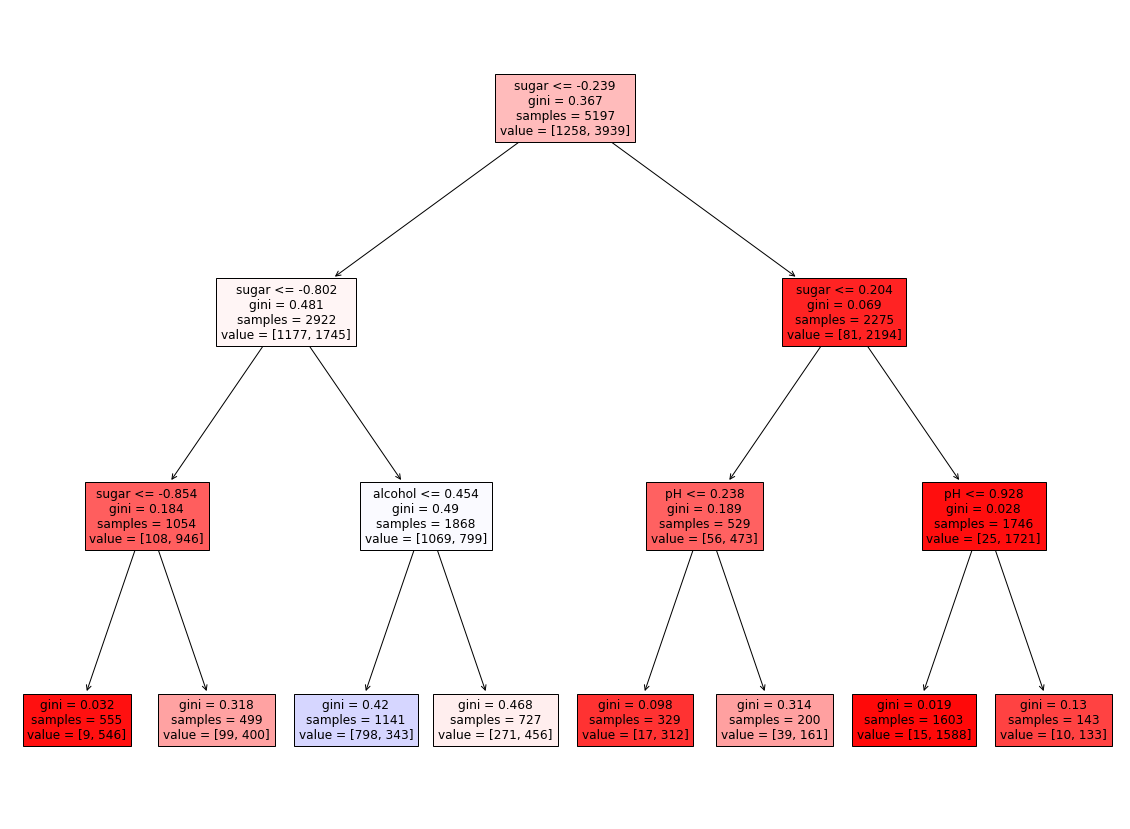

In [38]:
from matplotlib.colors import ListedColormap, to_rgb
import numpy as np

plt.figure(figsize=(20, 15))
artists = plot_tree(dt, filled = True, 
          feature_names = ['alcohol', 'sugar', 'pH'])

colors = ['blue', 'red']
for artist, impurity, value in zip(artists, dt.tree_.impurity, dt.tree_.value):
    r, g, b = to_rgb(colors[np.argmax(value)])
    f = impurity * 2
    artist.get_bbox_patch().set_facecolor((f + (1-f)*r, f + (1-f)*g, f + (1-f)*b))
    artist.get_bbox_patch().set_edgecolor('black')

plt.show()

# 마무리 정리
- 키워드
  - 결정 트리: yes / no 에 대한 질무능ㄹ 이어나가면서 정답을 찾아 학습하는 알고리즘. 성능이 뛰어남.
  - 불순도: 결정트리가 최적의 질문을 찾기 위한 기준. (사이킷런은 지니 불순도와 엔트로피 불순도를 제공)
  - 정보이득: 부모 노드와 자식 노드의 불순도 차이
  - 가지치기: 결정트리의 성장을 제한하는 방법
  - 특성중요도: 결정트리에 사용된 특성이 불순도를 감소하는데 기여한 정도를 나타내는 값
- Pandas 패키지
  - info(): 데이터프레임의 요약된 정보를 출력. 결측치가 있는지 알기위해 사용
  - describe(): 데이터 프레임 열의 통계 값을 제공
- Scikit-learn 패키지
  - DecisionTreeClassifier: 결정트리 분류 클래스.
    - 매개변수 criterion: 불순도를 지정 [default: gini]
    - 매개변수 splitter: 노트를 분할하는 전략을 선택 [defalt: best]
    - max_depth: 트리가 성장 할 최대 깊이를 지정 [defalt: None]
    - min_samples_split: 노드를 나누기 위한 최소 샘플 개수 [default: 2]
    - 매개변수 max_features: 최적의 분할을 위해 탐색 할 특성의 개수를 지정. [defalt: None]
  - plot_tree(): 결정 트리 모델을 시각화
    - 매개변수 max_depth: 나타낼 트리의 깊이를 지정. [defalt: None]
    - 매개변수 feature_names: 특성의 이름을 지정
    - 매개변수 filled: True로 지정하면 타깃값에 따라 노드 안에 색을 채움